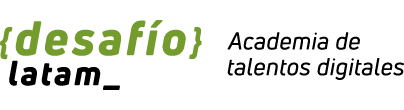

# <font color = 'green'>Redes neuronales </font>




 ## <font color = 'green'>Entrenamiento de un perceptrón</font>


Intentaremos predecir la edad de una persona que cuente con rut (en rigor, run) el cual representa un número único de identificación en Chile.

### <font color = 'green'>Carga de bibliotecas</font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from util_plot import plot_region_classifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs, make_circles

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD # Gradiente Descendente estocástico

plt.style.use('ggplot')

# backend usado por keras
print(f'Backend usado por keras: {keras.backend.backend()}')

Backend usado por keras: tensorflow


### <font color = 'green'>Carga de datos</font>

In [ ]:
df = pd.read_csv('rut.csv', sep=';', encoding='utf-8')
df.head()

fechaNacimiento        rut
0      1935-06-10  4075947-6
1      1935-07-09  3822071-3
2      1935-10-01  3583168-1
3      1937-04-19  4066560-9
4      1937-07-30  3690687-1

### <font color = 'green'>Transformación</font>
- Calculamos la edad en días desde la fecha de nacimiento con respecto al día de hoy.
- Se usa como variable regresora el RUT sin considerar el guión ni su digito verificador

In [ ]:
df['fechaNacimiento'] = pd.to_datetime(df['fechaNacimiento'], format='%Y-%m-%d')
fhoy = pd.to_datetime('today')

df['edad_dias'] = (fhoy - df['fechaNacimiento']).apply(lambda x: x.days)
df['rut2'] = df['rut'].str[:-2].astype('int')
df.tail()

fechaNacimiento         rut  edad_dias      rut2
1170      1998-02-16  19725671-0       9453  19725671
1171      1998-03-11  19512202-4       9430  19512202
1172      1998-09-23  19964601-K       9234  19964601
1173      1998-10-30  19964664-8       9197  19964664
1174      1999-02-18  19964817-9       9086  19964817

Estandarizaremos la variable regresora **rut2**

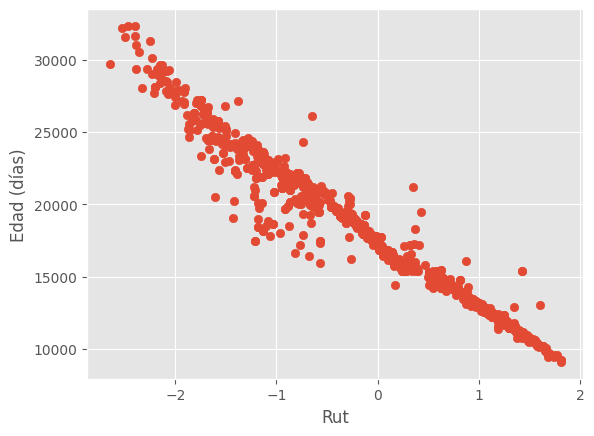

In [ ]:
ss = StandardScaler()
X_ss = ss.fit_transform(df[['rut2', 'edad_dias']])[:,0]
y = df['edad_dias']

plt.scatter(X_ss, df['edad_dias'])
plt.xlabel('Rut')
plt.ylabel('Edad (días)');

Se devide el conjunto de datos en entrenamiento y test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=.33, random_state=23)

### <font color = 'green'>Implementación</font>

In [ ]:
# creamos un modelo Secuencial
model_ann1 = Sequential()

# agregamos la capa de entrada
model_ann1.add(keras.Input(shape=(1,)))

# agregamos el perceptrón considerando un Bias
# y una función de activación lineal
model_ann1.add(
    Dense(
        units=1,
        activation='linear',
        use_bias=True
    )
)

model_ann1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Consolidamos el modelo de red neuronal describiendo el optimizador -que será el **Descenso del Gradiente Estocástico-** y como función de pérdida utilizaremos el **error cuadrático medio.** Como tasa aprendizaje utilizaremos 0.01.

In [ ]:
model_ann1.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error')

### <font color = 'green'>Entrenamiento</font>

Entrenaremos ahora el modelo, con 100 épocas

In [ ]:
model_ann1.fit(X_train, y_train, verbose=0, epochs=100)

Se mide el rendimiento del modelo en el conjunto de test, midiendo el RMSE y el $r^2$

13/13 [==============================] - 0s 1ms/step

Métricas conjunto de test
r2 = 0.9627750555746314
RMSE(edad años) = 2.5421738233409585



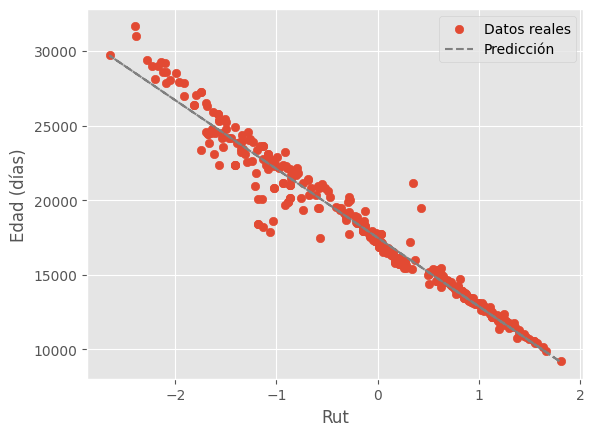

In [ ]:
yhat_test = model_ann1.predict(X_test).ravel()

print('\nMétricas conjunto de test')
print(f'r2 = {r2_score(y_test, yhat_test)}')
print(f'RMSE(edad años) = {mean_squared_error(y_test, yhat_test, squared=False)/365}')
print()

plt.scatter(X_test, y_test, label='Datos reales')
plt.plot(X_test, yhat_test, ls='--', color='gray', lw=1.5, label='Predicción')
plt.xlabel('Rut')
plt.ylabel('Edad (días)')
plt.legend();

### <font color = 'green'>Prueba</font>
Vamos ahora a poner a prueba nuestro modelo, utilizando para ello el rut y fecha de nacimiento del Presidente Gabriel Boric:

- Fecha de nacimiento: 11-02-1986
- Rut: 16.163.631-2

In [ ]:
rut2 = 16163631
fnac = '1986-02-11'


df_new = pd.DataFrame({'rut2': [rut2], 'fnac':[fnac]})
df_new['fnac'] = pd.to_datetime(df_new['fnac'], format='%Y-%m-%d')
df_new['edad_dias'] = (datetime.today() - df_new['fnac'][0]).days
df_new['edad_años'] = df_new['edad_dias']/365
df_new

rut2       fnac  edad_dias  edad_años
0  16163631 1986-02-11      13841  37.920548

In [ ]:
X_new = ss.transform(df_new.loc[:,['rut2', 'edad_dias']])[:,0]
model_ann1.predict(X_new)/365

1/1 [==============================] - 0s 21ms/step


array([[37.797382]], dtype=float32)

#<font color = 'green'>Implementación de una red neuronal</font>

Usaremos datos generados en forma aleatoria con separación lineal casi total, con cierto nivel de ruido. Nos enfrentamos a un problema de clasificación, con dos variables regresoras.

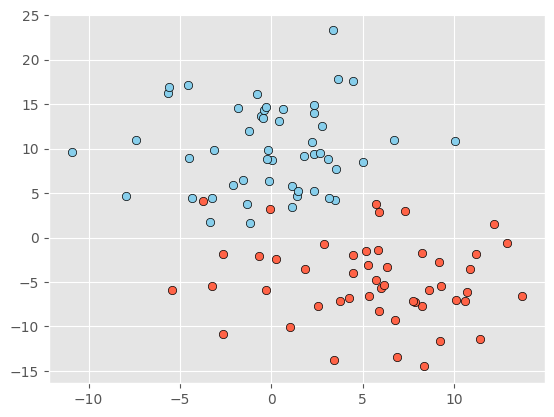

In [ ]:
# Generar datos de ejemplo
X, y = make_blobs(n_samples=100, centers=2, random_state=23, cluster_std=4.5)
X_class0 = X[np.argwhere(y==0).ravel()]
X_class1 = X[np.argwhere(y==1).ravel()]

plt.scatter(X_class0[:,0], X_class0[:,1], c='skyblue', marker='o', edgecolors='k')
plt.scatter(X_class1[:,0], X_class1[:,1], c='tomato', marker='o', edgecolors='k');

##<font color = 'green'>Separación de los datos</font>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=23)

##<font color = 'green'>Creación del modelo</font>
Creamos nuestro modelo de red neuronal usando sólo un Perceptrón

In [ ]:
model_ann2 = Sequential()

model_ann2.add(keras.Input(shape=(2,)))
model_ann2.add(
    Dense(
        units=1,
        activation='sigmoid',
        use_bias=True
    )
)

model_ann2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compilamos nuestra red neuronal definiendo el optimizador (SGD) y la función de pérdida. y entrenamos la red usando 100 épocas.
Para problemas de clasificación binaria se recomienda usar función de pérdida la entropía cruzada.

In [ ]:
model_ann2.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy')
model_ann2.fit(X_train, y_train, epochs=100, verbose=0)

Medimos las métricas asociadas a la matriz de confusión, para el conjunto de test

In [ ]:
yhat = model_ann2.predict(X_test)
yhat = np.where(yhat < .5, 0, 1)

print(classification_report(y_test, yhat))

2/2 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.95      0.97        20

    accuracy                           0.97        33
   macro avg       0.96      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



In [ ]:
plot_region_classifier(X_test, y_test, model_ann2)

2813/2813 [==============================] - 4s 1ms/step


##<font color = 'green'>Red neuronal con perceptrón unicapa, para datos sin separación lineal</font>

In [ ]:
X, y = make_circles(n_samples=800, noise=0.08, factor=0.3, random_state=23)

idx_class0 = np.argwhere(y==0).ravel()
idx_class1 = np.argwhere(y==1).ravel()

plt.scatter(X[idx_class0,0], X[idx_class0,1], c='skyblue', marker='o', edgecolors='k')
plt.scatter(X[idx_class1,0], X[idx_class1,1], c='tomato', marker='o', edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2');

##<font color = 'green'>Separación de los datos</font>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=23)

##<font color = 'green'>Creación de la arquitectura</font>
Creamos la arquitectura de la red neuronal con sólo un Perceptrón

In [ ]:
model_ann3 = Sequential()

model_ann3.add(keras.Input(shape=(2,)))
model_ann3.add(
    Dense(
        units=1,
        activation='sigmoid',
        use_bias=True
    )
)

model_ann3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Se compila el modelo de red neuronal y se entrena con los datos de entrenamiento. Se usan 100 épocas.

In [ ]:
model_ann3.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy')
model_ann3.fit(X_train, y_train, epochs=100, verbose=0)

2813/2813 [==============================] - 4s 1ms/step


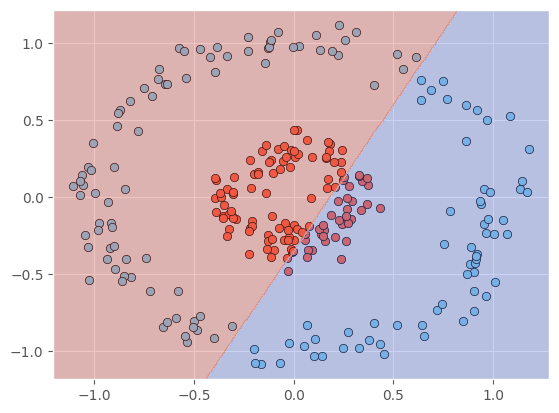

In [ ]:
plot_region_classifier(X_test, y_test, model_ann3, pad=0.1)

##<font color = 'green'>Utilizando una capa oculta</font>
Se agrega una capa oculta a nuestra red con 15 neuronas, usando función de activación Relu en la capa oculta.

In [ ]:
model_ann4 = Sequential()

model_ann4.add(keras.Input(shape=(2,)))
model_ann4.add(
    Dense(
        units=15,
        activation='relu',
        use_bias=True
    )
)

model_ann4.add(
    Dense(
        units=1,
        activation='sigmoid',
        use_bias=True
    )
)

model_ann4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 15)                45        
                                                                 
 dense_4 (Dense)             (None, 1)                 16        
                                                                 
Total params: 61 (244.00 Byte)
Trainable params: 61 (244.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Entrenamos y compilamos nuestra red neuronal para 100 épocas

In [ ]:
model_ann4.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy')
model_ann4.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
plot_region_classifier(X_test, y_test, model_ann4, pad=0.1)

2813/2813 [==============================] - 5s 2ms/step
